In [338]:
!pip install leidenalg

In [339]:
import leidenalg

In [340]:
pip install --user scikit-misc

Note: you may need to restart the kernel to use updated packages.


In [341]:
import scanpy as sc
#import scvi

In [342]:
# Reading the file and creating an adata object
#file = 'GSE67835_transformedRenamed_log_rounded.tsv'
file = 'GSE67835_CPM_named_clean.tsv'
adata = sc.read_text(file, delimiter='\t').T 
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [343]:
adata

AnnData object with n_obs × n_vars = 466 × 46766

In [344]:
results_file = 'brain.h5ad' 

# Preprocessing

In [345]:
# Doublet removal <- this didnt work so well, so I'm going to move on
# sc.pp.filter_genes(adata, min_cells=10)
# scvi.model.SCVI.setup_anndata(adata)
# vae = scvi.model.SCVI(adata)
# vae.train()


# solo = scvi.external.SOLO.from_scvi_model(vae)
# solo.train()


normalizing counts per cell
    finished (0:00:00)


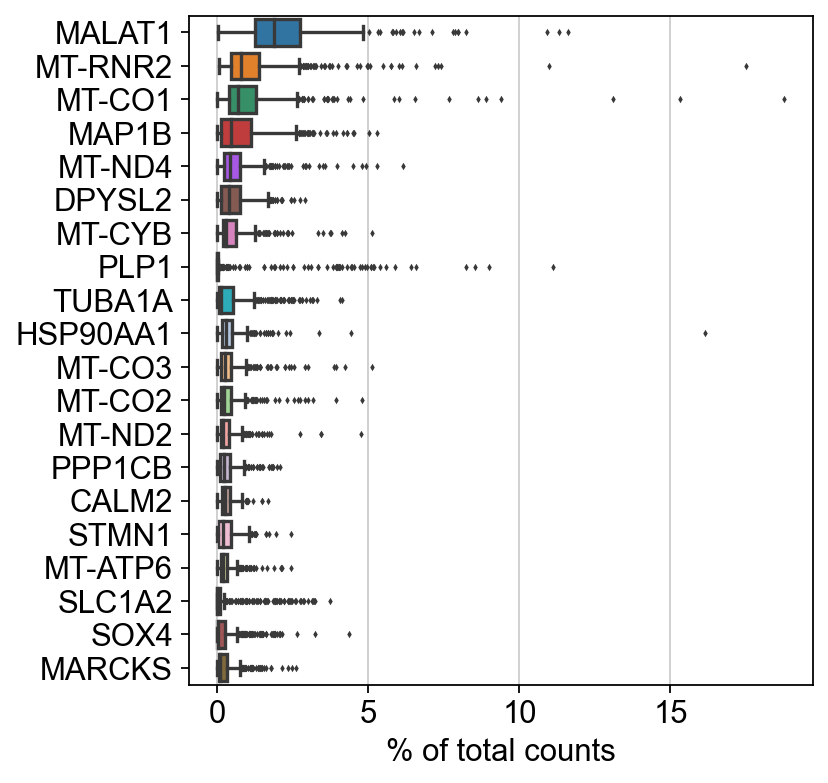

In [346]:
# Visualisation of the top 20 highest expresses genes
sc.pl.highest_expr_genes(adata, n_top=20, )

In [347]:
# This can be used to find the cell and gene names
# adata.var_names
# adata.obs_names

In [348]:
# Simple filtering 
#sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=3)

In [349]:
# Adds a column with a boolean whether a mitochrondrial gene is present
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [350]:
# Visualising the genes which are mitochondrial
adata.var[adata.var.mt == True]

,mt
MT-ATP6,True
MT-ATP8,True
MT-CO1,True
MT-CO2,True
MT-CO3,True
MT-CYB,True
MT-ND1,True
MT-ND2,True
MT-ND3,True
MT-ND4,True


In [351]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [352]:
adata

AnnData object with n_obs × n_vars = 466 × 46766
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

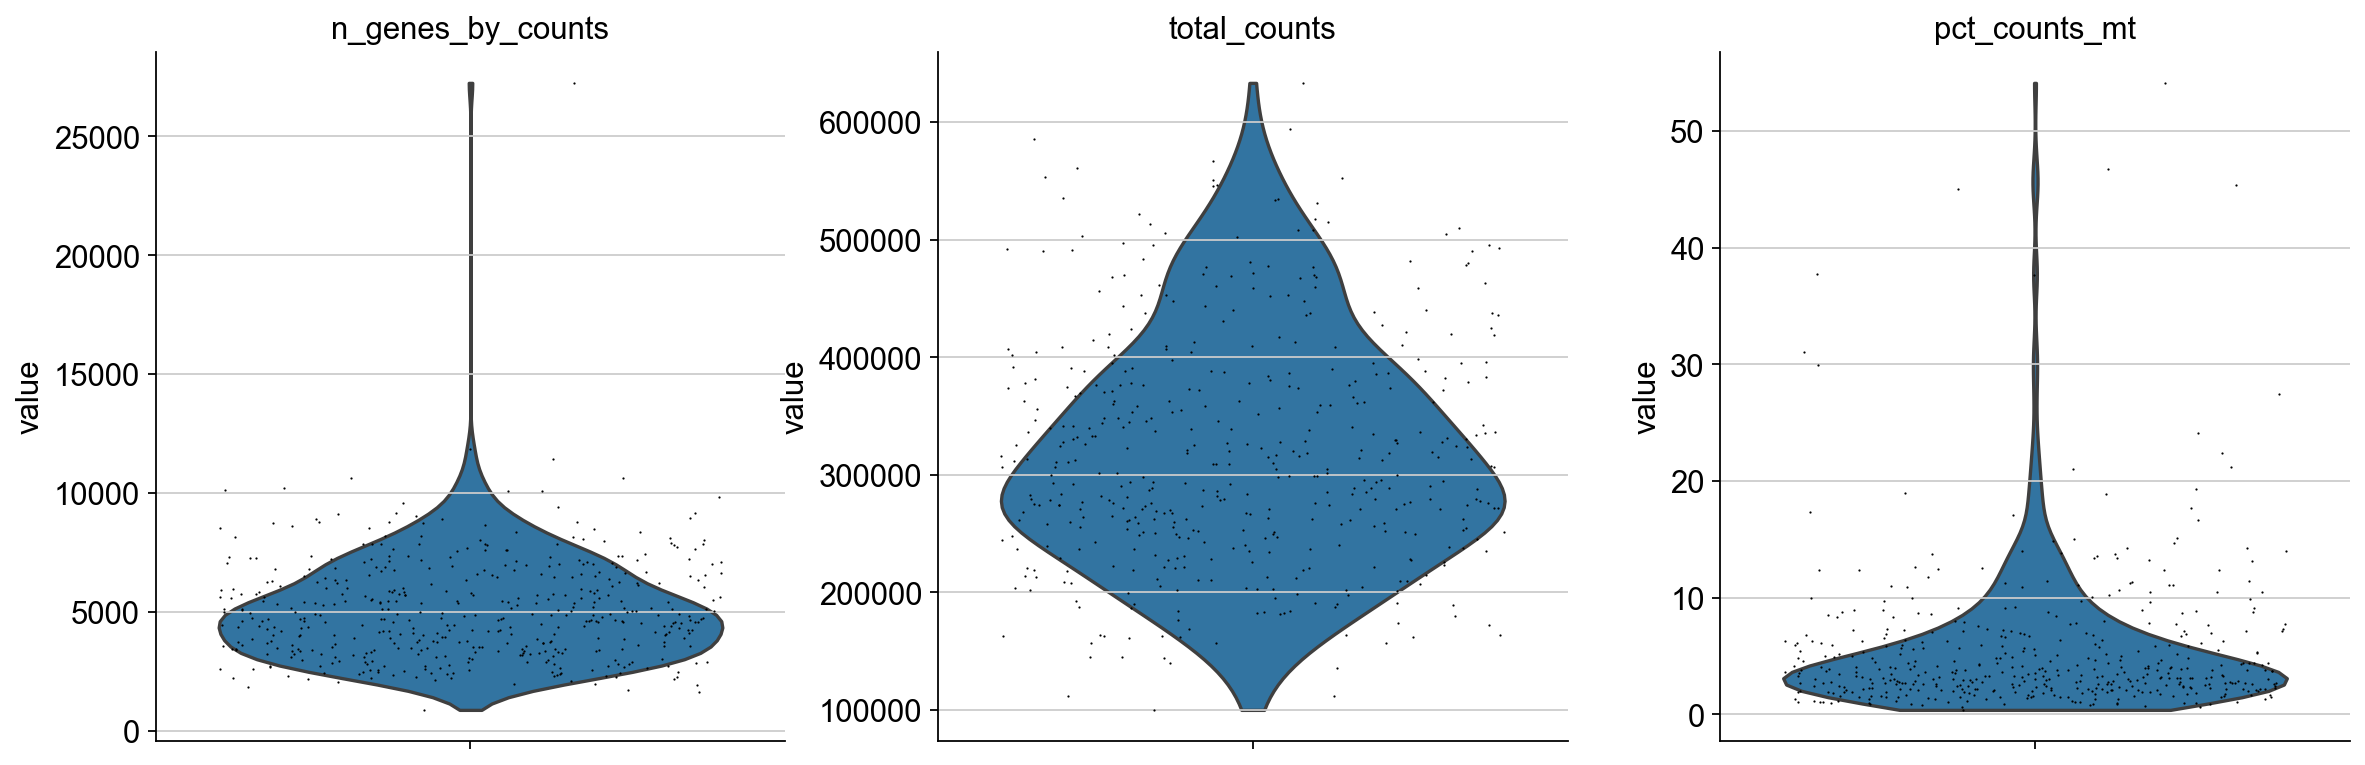

In [353]:
# Violin plots for number of genes expressed in the matrix, total counts per cell and % counts in mt cells
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [354]:
# Identifying the cell that has over 50% mitochondrial genes
adata.obs[adata.obs.pct_counts_mt > 50]

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
SRR1974727,6215,300123.78125,162458.9375,54.130642


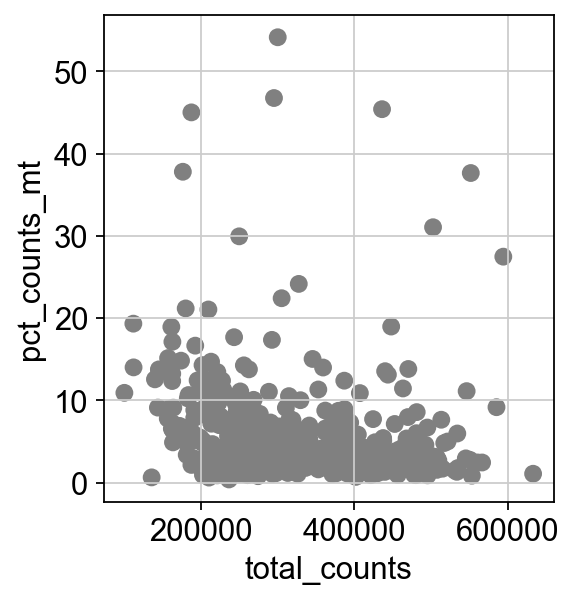

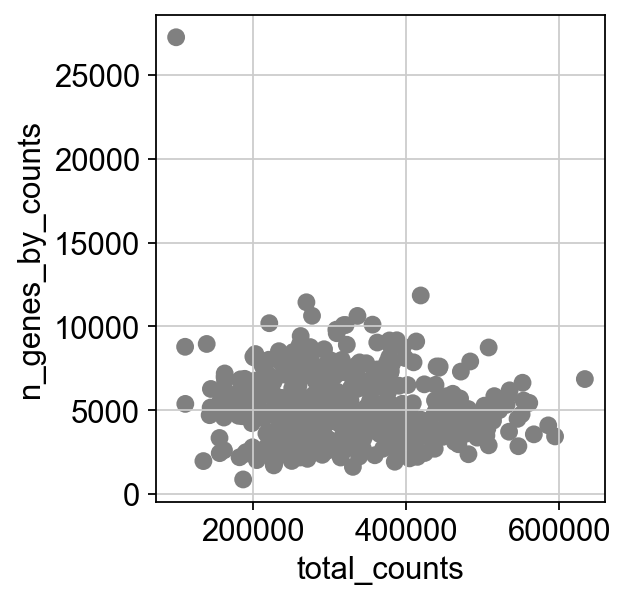

In [355]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [356]:
# Selecting genes that have a % mitochondrial count of 10%
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [357]:
sc.pp.log1p(adata)

/home/mtk13/source.bashrc/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [358]:
# Highly variable genes using default calues

sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor='seurat_v3')


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/mtk13/source.bashrc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


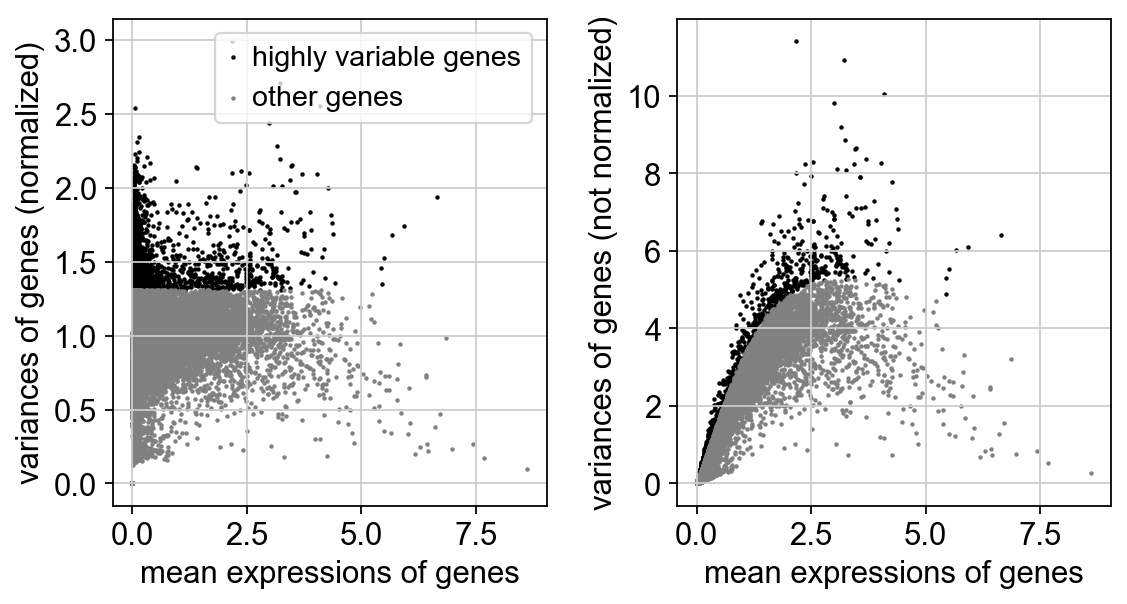

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
A1CF,False,13,1.040758,97.210300,484.993408,True,461.0,0.042687,0.164142,1.697853
A2M,False,120,67.567497,74.248927,31486.453125,True,617.0,0.814049,3.424923,1.646555
A2M-AS1,False,11,0.990853,97.639485,461.737305,True,1591.0,0.056433,0.194762,1.484840
A2MP1,False,43,3.251089,90.772532,1515.007568,True,3253.0,0.229555,0.803247,1.348981
AASS,False,236,119.654556,49.356223,55759.023438,True,373.0,2.130118,6.591555,1.737369
...,...,...,...,...,...,...,...,...,...,...
ZSCAN20,False,20,1.814577,95.708155,845.592834,True,1337.0,0.106040,0.392182,1.515074
ZSCAN32,False,71,8.588867,84.763948,4002.412109,True,3915.0,0.396861,1.369104,1.313190
ZSCAN9,False,50,7.184987,89.270386,3348.203857,True,3648.0,0.307139,1.067425,1.326268
ZSWIM3,False,16,1.161117,96.566524,541.080566,True,1733.0,0.075286,0.262829,1.468707


In [359]:
sc.pl.highly_variable_genes(adata)
adata.var[adata.var.highly_variable]

In [360]:
adata.raw = adata

In [361]:
# Filtering out the genes that aren't highly variable
adata = adata[:, adata.var.highly_variable]

In [362]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:04)


In [363]:
sc.pp.scale(adata, max_value=10)

# Principal Component Analysis

In [364]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


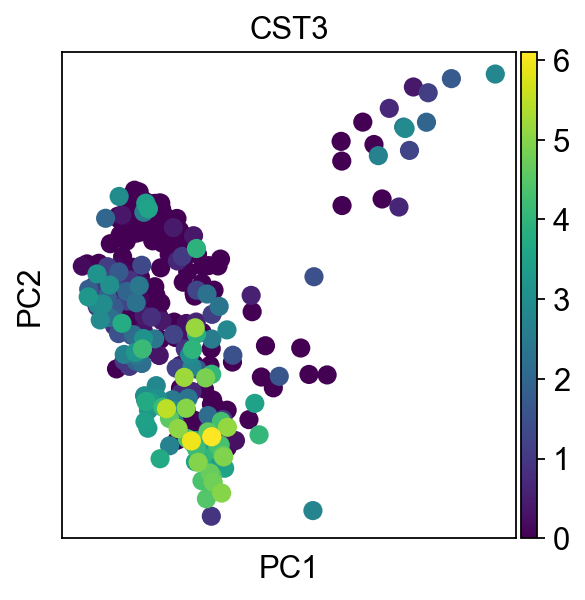

In [365]:
sc.pl.pca(adata, color='CST3')

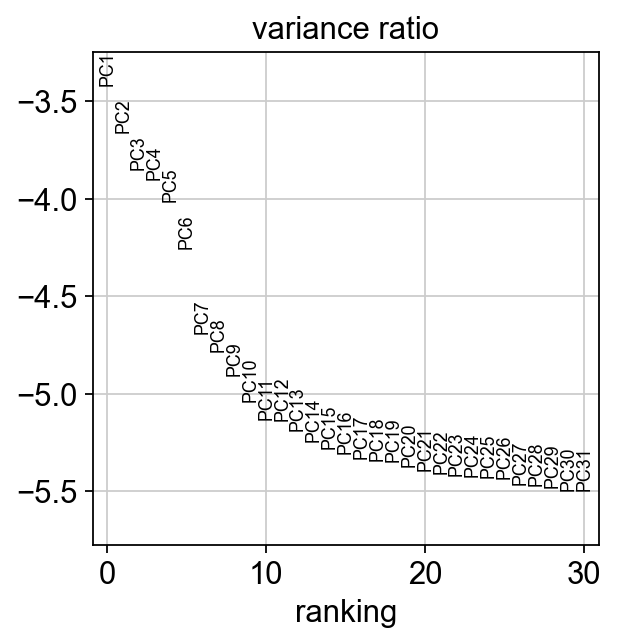

In [366]:
sc.pl.pca_variance_ratio(adata, log=True)

In [367]:
adata.write(results_file)

In [368]:
adata

AnnData object with n_obs × n_vars = 403 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [369]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [370]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)


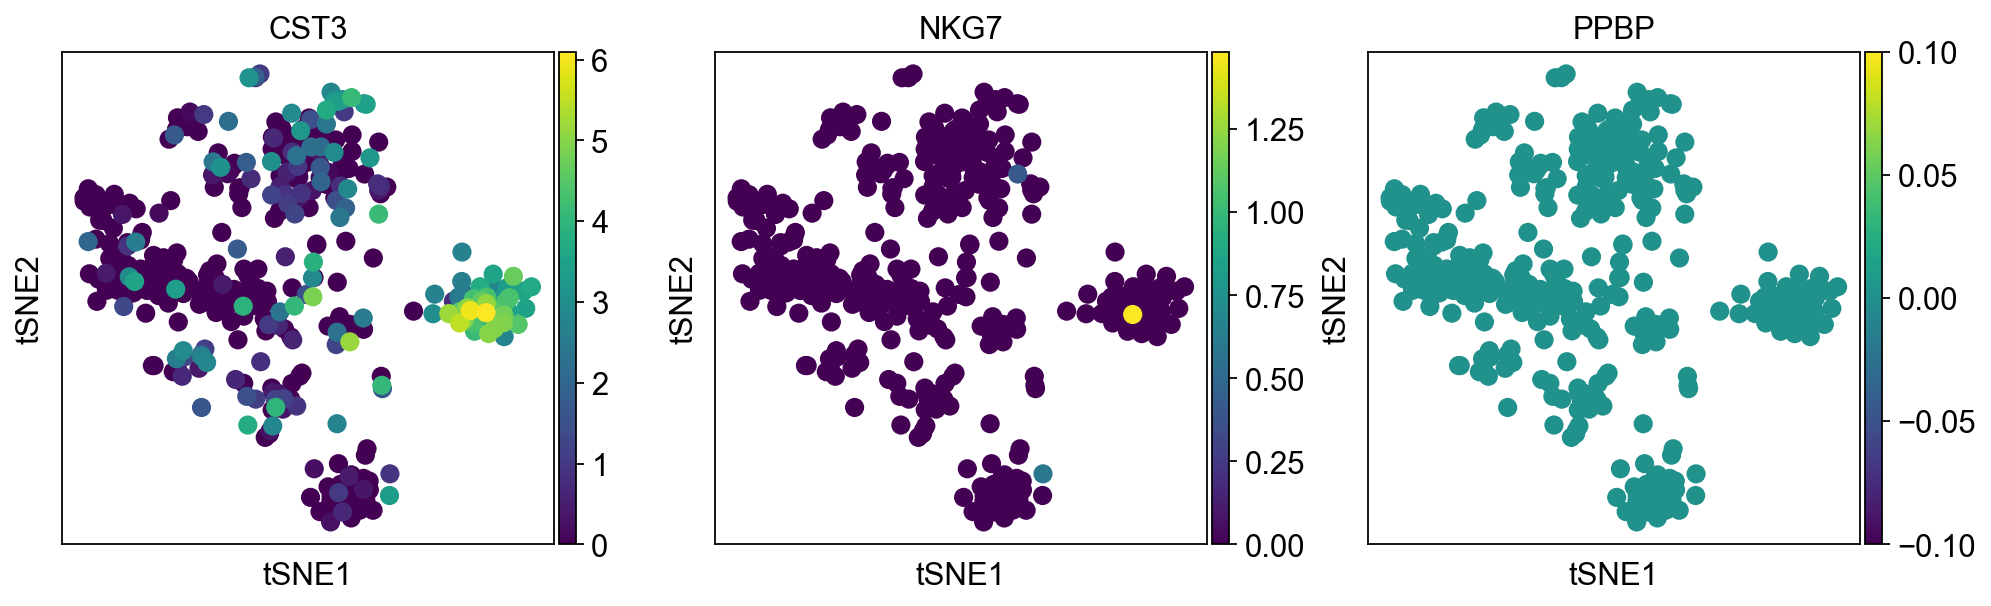

In [371]:
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'])

In [372]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


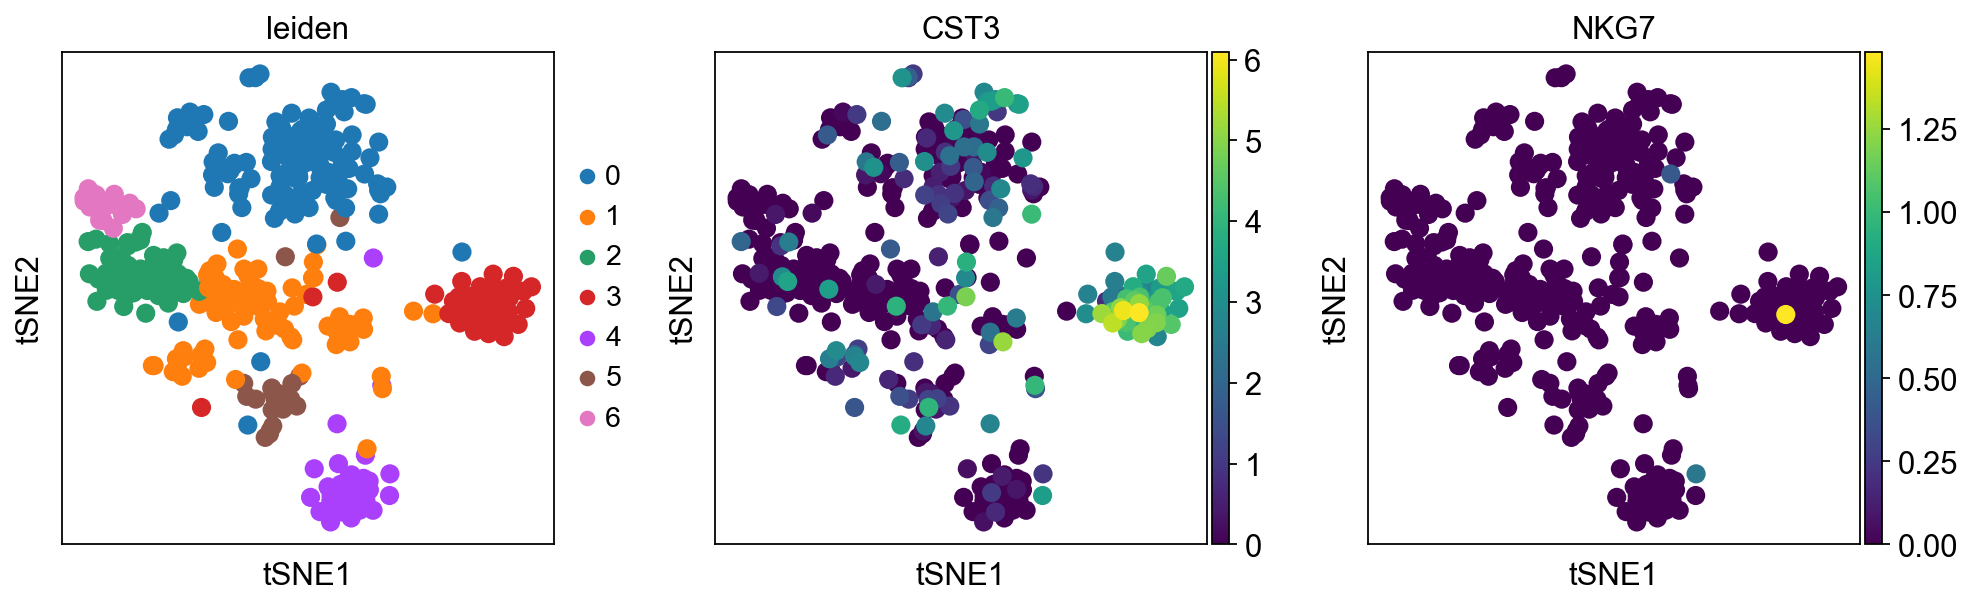

In [373]:
sc.pl.tsne(adata, color=['leiden', 'CST3', 'NKG7'])

# Finding Marker Genes

In [374]:
sc.tl.leiden(adata, resolution=1.2)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


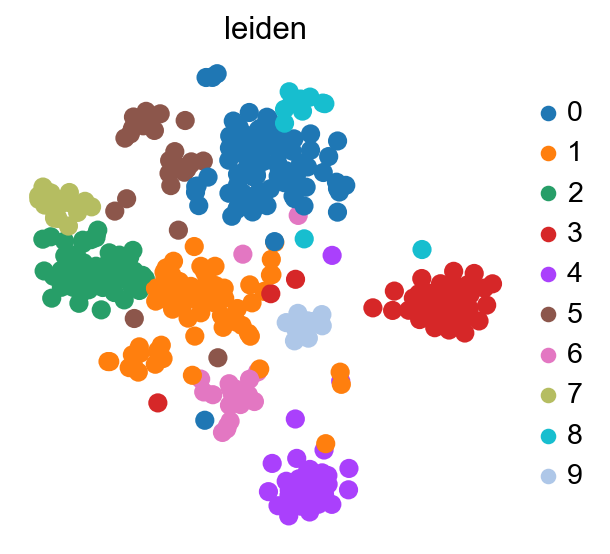

In [375]:
sc.pl.tsne(adata, color = ['leiden'], frameon = False)

In [376]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


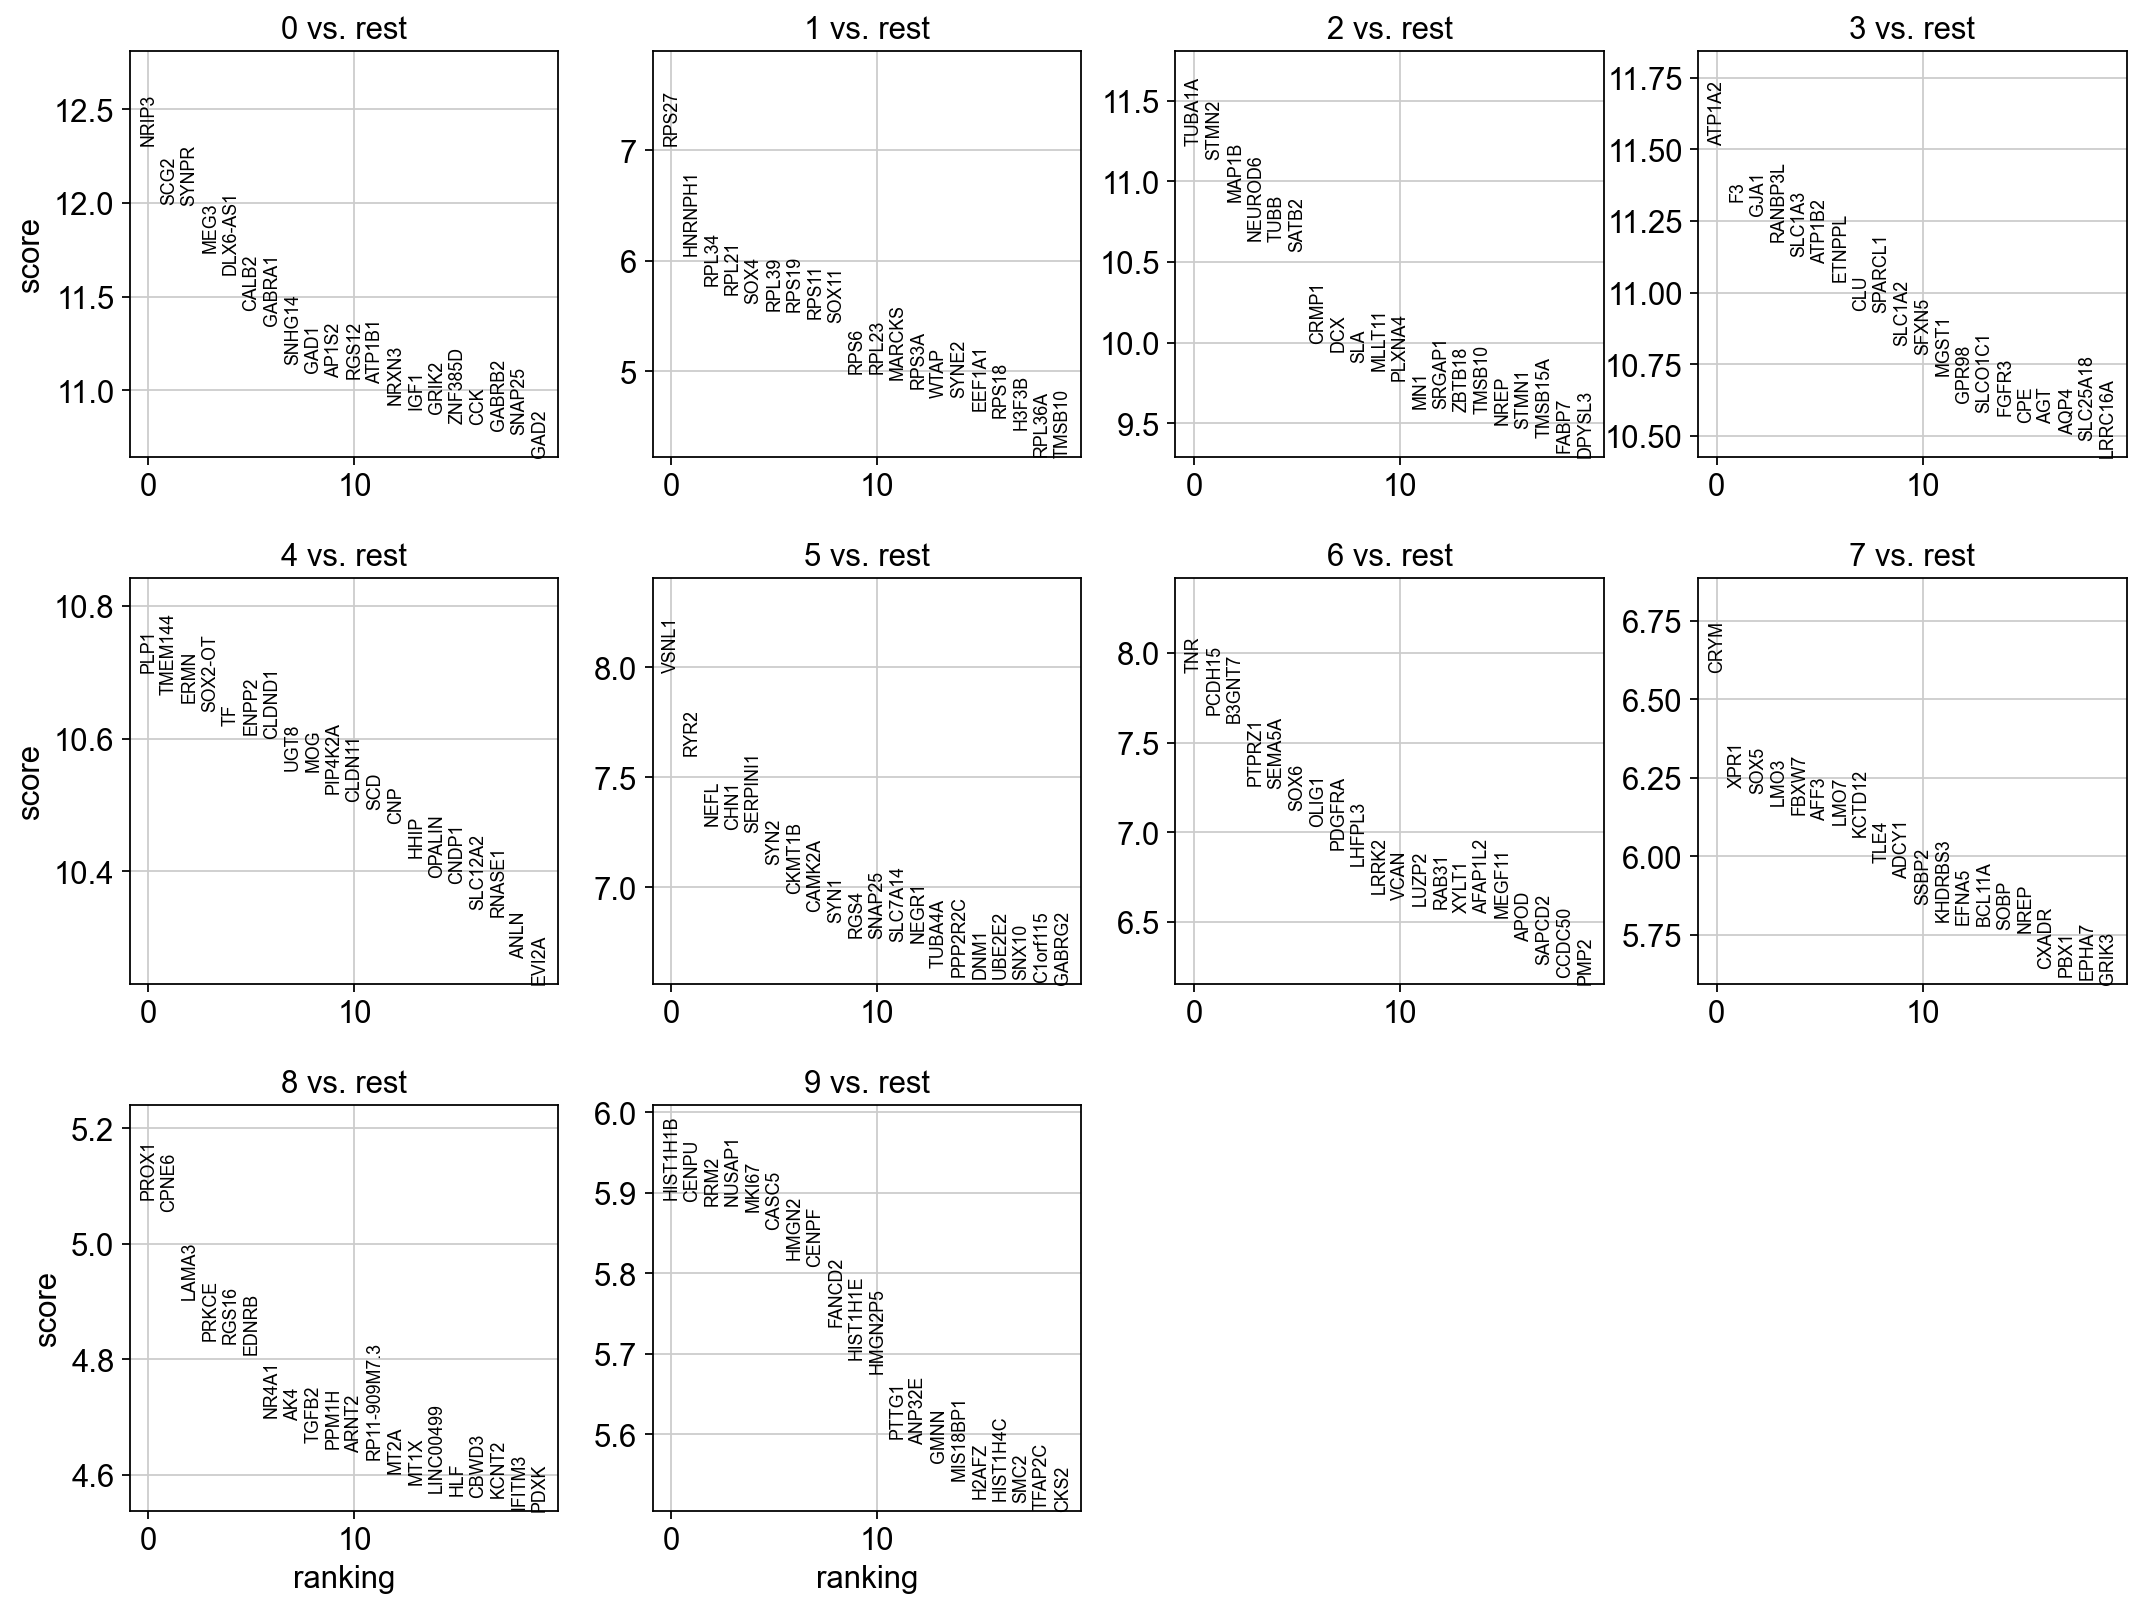

In [377]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [378]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,NRIP3,12.309119,6.760633,8.090150e-35,3.783440e-30
1,0,SCG2,11.996498,6.210035,3.706495e-33,6.231852e-29
2,0,SYNPR,11.990235,7.121284,3.997681e-33,6.231852e-29
3,0,MEG3,11.735546,5.709345,8.378404e-32,9.795611e-28
4,0,DLX6-AS1,11.618639,7.104732,3.313721e-31,3.099390e-27
...,...,...,...,...,...,...
421085,9,DIAPH3,3.693576,6.244065,2.211227e-04,4.854941e-02
421086,9,YWHAE,3.691060,1.452761,2.233218e-04,4.880313e-02
421087,9,PHIP,3.688544,2.753087,2.255415e-04,4.883182e-02
421088,9,NFIC,3.688544,3.595872,2.255415e-04,4.883182e-02


In [50]:
# Identify the top 2 genes in each group with highest logfoldchanges
df1 = markers
df1.loc[df1.groupby('group')['logfoldchanges'].nlargest(2).index.get_level_values(1)]

,group,names,scores,logfoldchanges,pvals,pvals_adj
2,0,SYNPR,11.990235,7.121284,3.997681e-33,6.231852e-29
4,0,DLX6-AS1,11.618639,7.104732,3.313721e-31,3.099390e-27
46837,1,C1QA,2.838698,8.291865,4.529795e-03,4.596233e-02
46820,1,ITGAX,3.192155,5.197433,1.412155e-03,1.757808e-02
93535,2,NEUROD6,10.638222,7.729523,1.978700e-26,2.035180e-22
93537,2,SATB2,10.569890,7.656928,4.109767e-26,3.203289e-22
140315,3,AQP4,10.505355,9.732701,8.161556e-26,2.120463e-22
140304,3,ETNPPL,11.040619,9.699903,2.433512e-28,1.625794e-24
187064,4,PLP1,10.700719,12.617879,1.009918e-26,1.969928e-22
187066,4,ERMN,10.655007,11.401220,1.652323e-26,1.969928e-22


In [379]:
cell_type = {"0":"GABAergic neurons/Interneurons",
"1":"Dendrituc cells, Monocytes, Macrophages",
"2":"Developing neurons",
"3":"Astrocytes",
"4":"Oligodendrocytes",
"5":"Pyramidal cells",
"6":"Oligodendrocyte Progenitor Cells(OPCs)",
"7":"Cortical neurons",
"8":"Interneurons",
"9":"Radial glial cells/Neural Progenitor cells",
    }

In [380]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

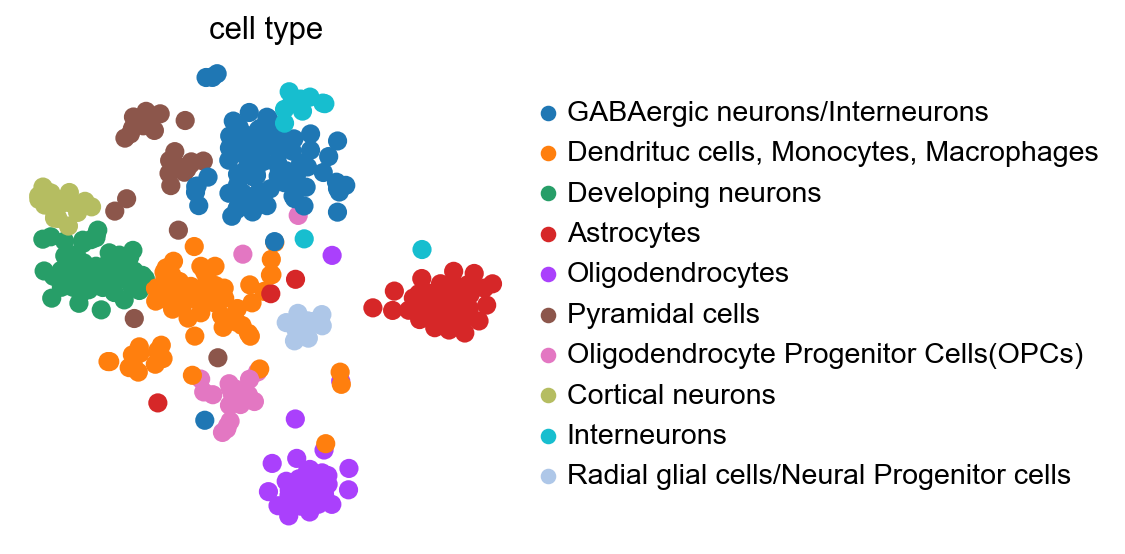

In [381]:
sc.pl.tsne(adata, color = ['cell type'], frameon = False,)

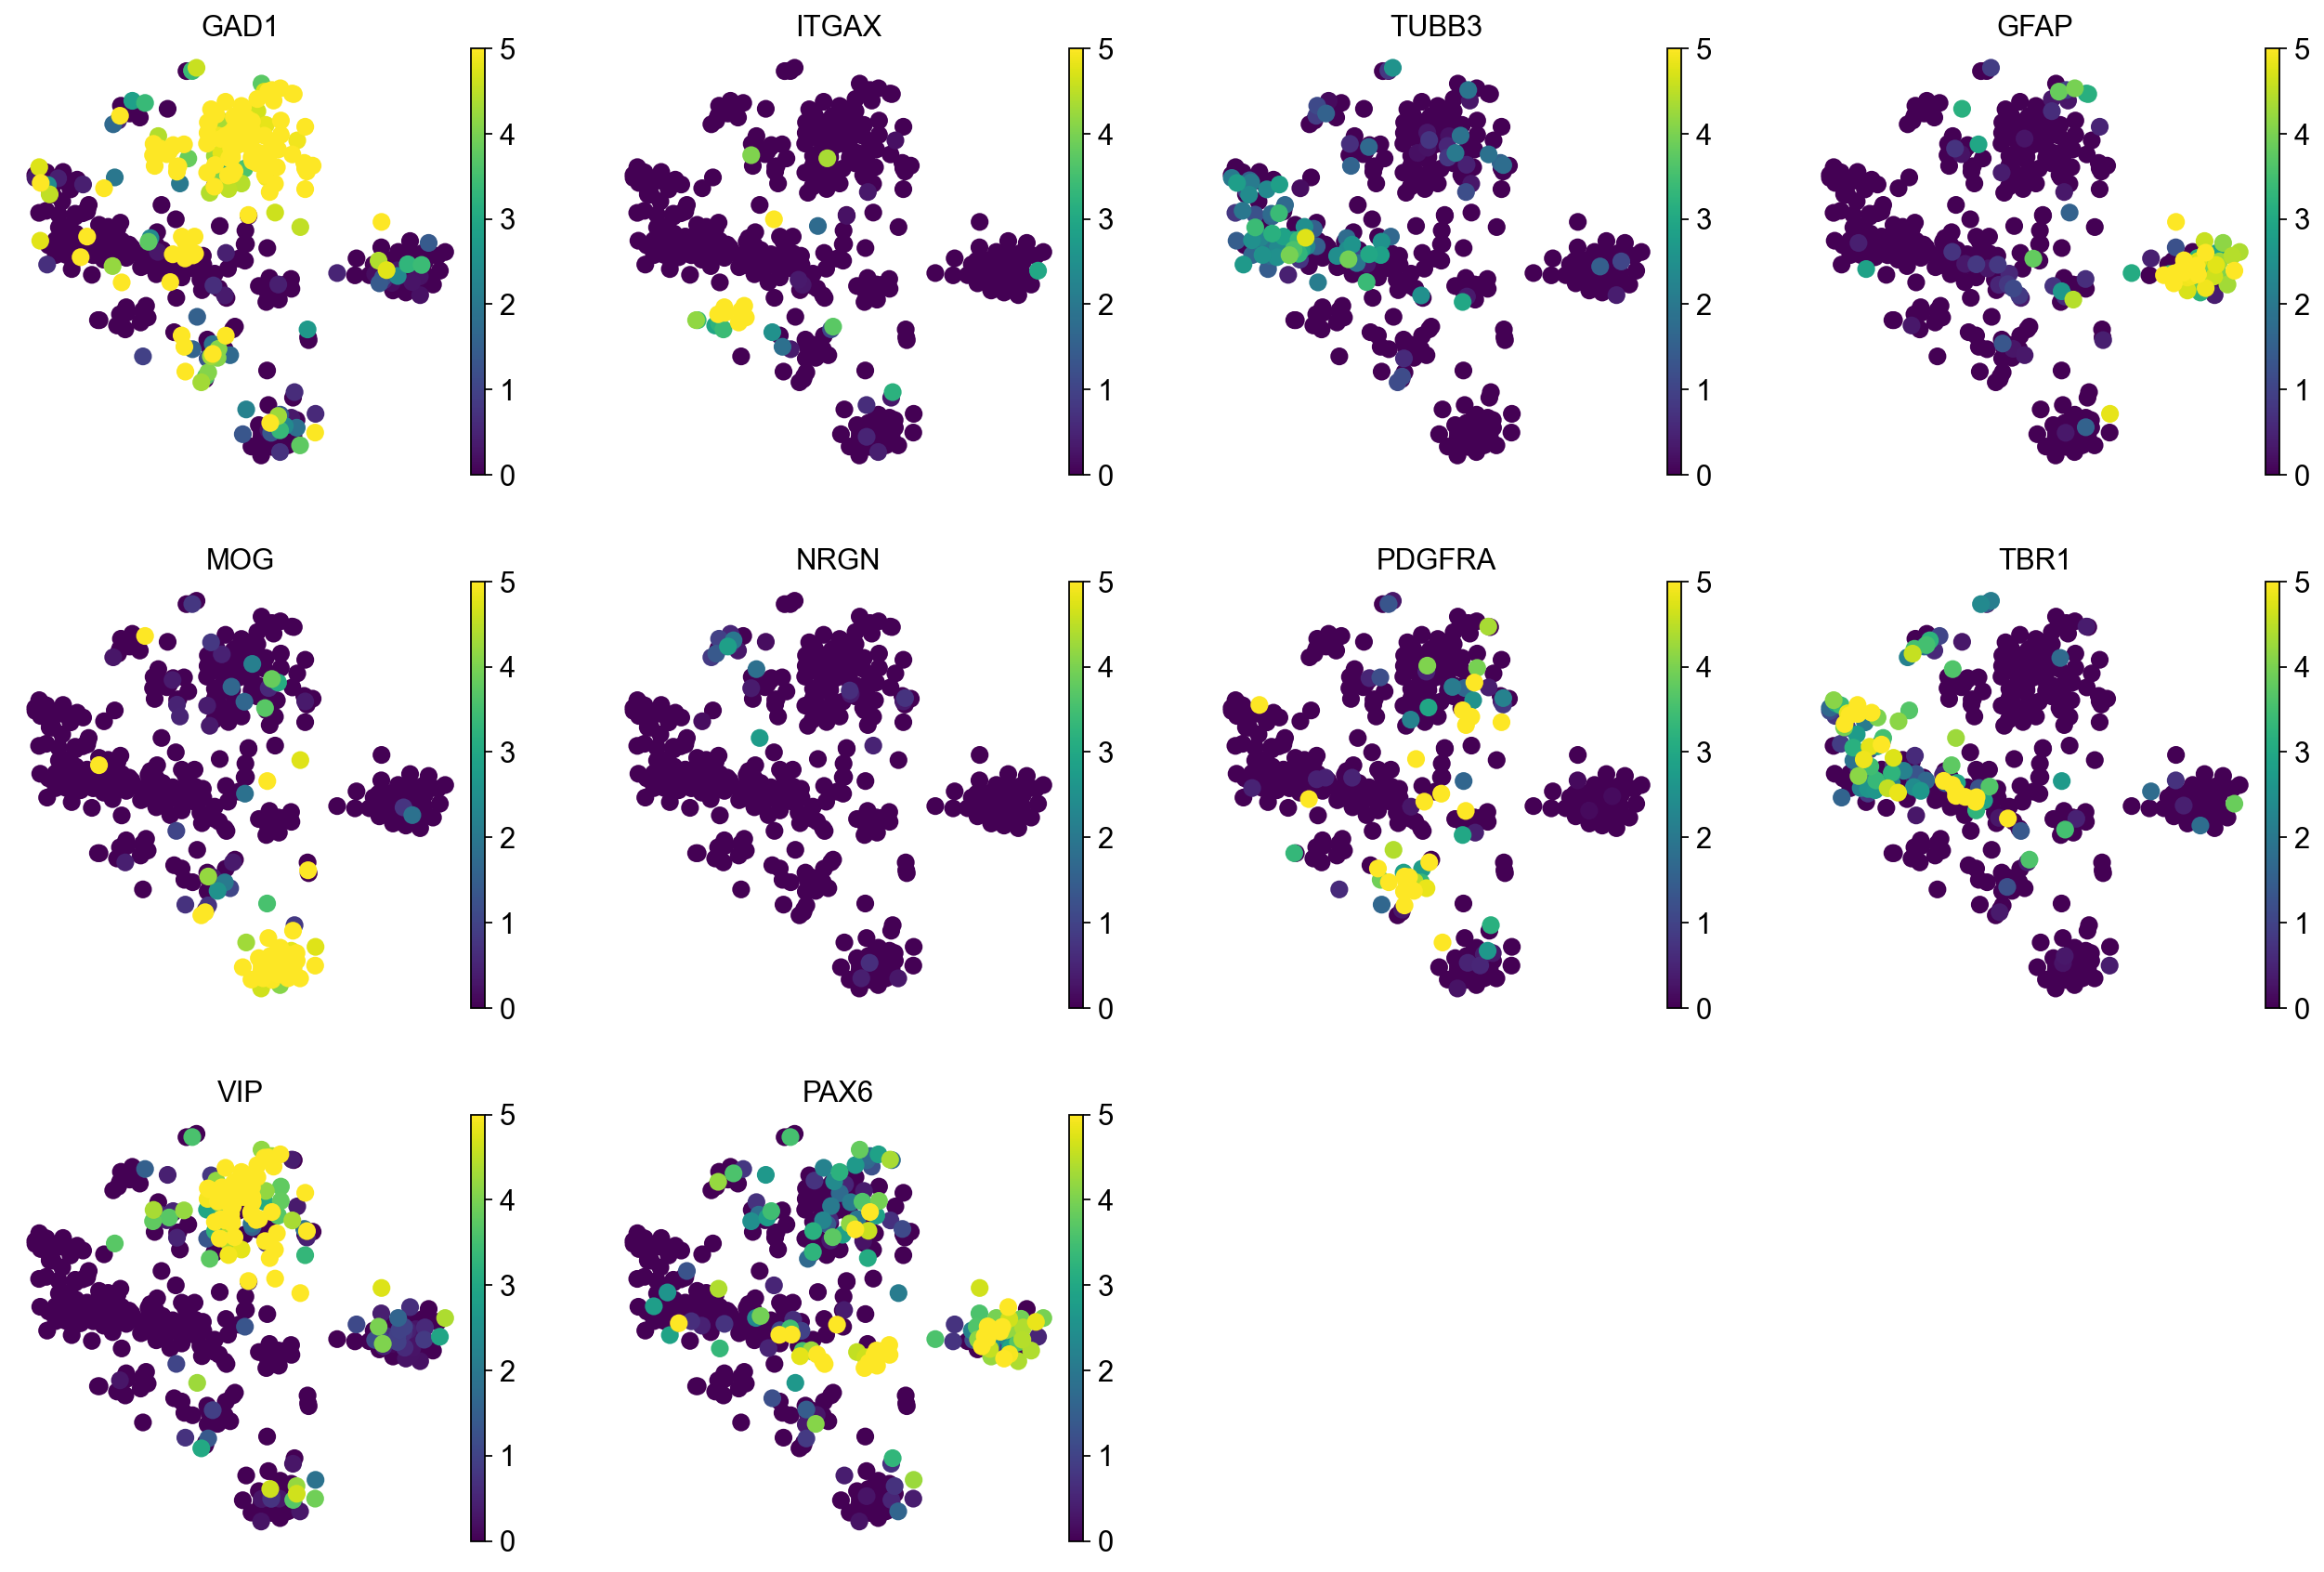

In [382]:
sc.pl.tsne(adata, color = ['GAD1','ITGAX','TUBB3','GFAP','MOG','NRGN','PDGFRA','TBR1','VIP','PAX6' ], frameon = False, vmax = 5)

In [385]:
markers[markers.names == 'GAD1'] #cross validate marker genes by comparing the logfoldchanges

,group,names,scores,logfoldchanges,pvals,pvals_adj
8,0,GAD1,11.096735,6.366651,1.301110e-28,6.760857e-25
374277,8,GAD1,3.976798,5.128246,6.984947e-05,2.177720e-02
